In [1]:
import sys
sys.path.append("../trainer")

In [2]:
from dataclasses import dataclass, field
import os

from transformers import AutoTokenizer
import torchvision as tv

from datamodule import IAMDataModule

/home/israel/Mestrado/mscenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tokenizer = AutoTokenizer.from_pretrained("../trainer/iam-tokenizers/tokenizer-pad0/")

In [4]:
DATA_PATH = "../data/IAM/data/"

In [5]:
dm = IAMDataModule(
    root_dir=DATA_PATH,
    label_file=os.path.join(DATA_PATH, "data.json"),
    tokenizer=tokenizer,
    height=32,
    num_workers=4,
    train_bs=16,
    valid_bs=64,
    val_pct=0.1,
    max_width=None,
    do_pool=True,
    pooler_mode="mine"
)

In [6]:
dm.setup("fit")

/home/israel/Mestrado/mscenv/lib/python3.10/site-packages/albumentations/augmentations/transforms.py:1554: UserWarning: Using default interpolation INTER_NEAREST, which is sub-optimal.Please specify interpolation mode for downscale and upscale explicitly.For additional information see this PR https://github.com/albumentations-team/albumentations/pull/584
  warnings.warn(


In [7]:
batch = next(iter(dm.train_dataloader()))

In [8]:
images, labels, *_ = batch

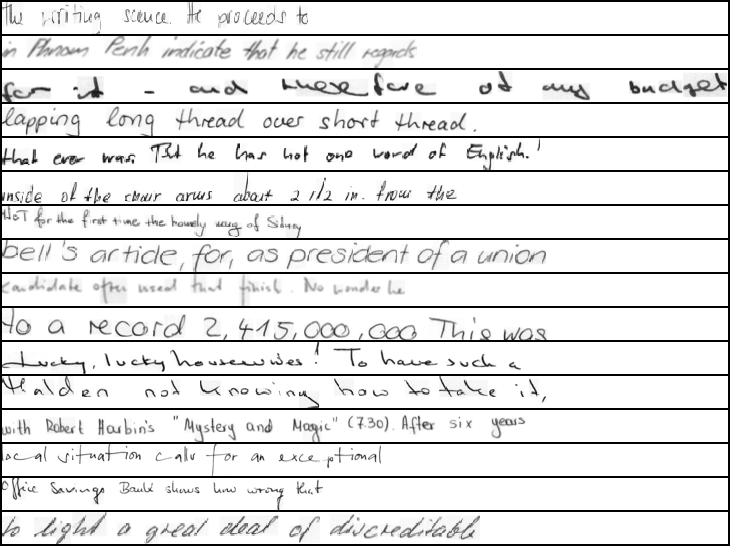

In [9]:
# make grid
grid = tv.utils.make_grid(images, nrow=1, normalize=True, pad_value=255)
# display grid
tv.transforms.ToPILImage()(grid)

In [10]:
tokenizer.batch_decode(labels, skip_special_tokens=True)

['the writing scene. He proceeds to',
 'in Phnom Penh indicate that he still regards',
 'for it - and therefore of any budget',
 'lapping long thread over short thread.',
 "that ever was. But he has not one word of English. '",
 'inside of the chair arms about 2 1/2 in. from the',
 'NOT for the first time the homely mug of Sidney',
 "bell's article, for, as president of a union",
 'candidate often used that finish. No wonder he',
 'to a record 2,415,000,000. This was',
 'Lucky, lucky housewives! To have such a',
 'Malden not knowing how to take it,',
 'with Robert Harbin\'s " Mystery and Magic " ( 7.30 ). After six years',
 'local situation calls for an exceptional',
 'Office Savings Bank shows how wrong that',
 'to light a great deal of discreditable']

In [11]:
len(dm.train_dataset)

6161